In [6]:
#Pip install the required needs
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Importation of all the required librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from flask import Flask, render_template, request
import joblib


In [2]:
#Uses Pandas to read the .csv file
data = pd.read_csv("C:/Users/Brand/Downloads/weatherHistory.csv")

In [3]:
#Prints the first 5 results of the weatherHistory.csv
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
#Prints the last 5 results of the weatherHistory.csv
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [5]:
#This calculates the amount, mean, standard, minimum, percentages, and max of the weatherHistory.csv
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
#This tells us the amounts of columns as Y and the rows as X
data.shape

(96453, 12)

In [7]:
# This tells a more transparent and terminal explanation of the table
data.nunique

<bound method DataFrame.nunique of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197  

In [8]:
#This was to test whether the weatherHistory.csv was able to succesfully drop a columns that was not needed.
weather = data.drop(['Loud Cover'], axis = 1)

In [9]:
#Again the data "weather" was essentially used to see if it was successful through printing the first 5 results.
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [10]:
#Tested if we were able to gather 2000 results of the data for use.
data_sample = data.sample (n=2000, random_state = 1)

In [11]:
#The data ended up being finalized as data_sample so I printed to see if it worked.
data_sample.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
9597,2007-08-12 21:00:00.000 +0200,Mostly Cloudy,rain,18.938889,18.938889,0.84,7.7924,233.0,9.9820,0.0,1008.04,Partly cloudy throughout the day.
26204,2008-09-04 20:00:00.000 +0200,Partly Cloudy,rain,24.122222,24.122222,0.46,7.8568,209.0,10.3523,0.0,1012.41,Partly cloudy starting overnight continuing un...
6282,2006-05-26 19:00:00.000 +0200,Mostly Cloudy,rain,20.088889,20.088889,0.60,10.9480,346.0,9.9820,0.0,1019.48,Mostly cloudy throughout the day.
92330,2016-06-02 05:00:00.000 +0200,Overcast,rain,14.466667,14.466667,0.99,15.4077,291.0,6.8425,0.0,1011.14,Mostly cloudy throughout the day.
51067,2011-11-06 20:00:00.000 +0100,Mostly Cloudy,rain,9.716667,7.405556,0.67,16.4703,149.0,9.9015,0.0,1023.45,Mostly cloudy starting overnight continuing un...


In [12]:
#This was used to fix an error that had popped up which involved type
print(data_sample.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


C:\Users\Brand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Brand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Brand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy: 0.5
Confusion Matrix:
 [[ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  1  0  1]
 [ 0  0  0  6  1 12  6 28]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  8  0 52 16 44]
 [ 0  0  0  0  0 24 24 10]
 [ 0  0  0  7  0 34  6 85]]
Classification Report:
                           precision    recall  f1-score   support

Breezy and Mostly Cloudy       0.50      1.00      0.67         1
     Breezy and Overcast       0.00      0.00      0.00         1
Breezy and Partly Cloudy       0.00      0.00      0.00         3
                   Clear       0.29      0.11      0.16        53
                   Foggy       0.97      1.00      0.98        32
           Mostly Cloudy       0.42      0.43      0.43       120
                Overcast       0.46      0.41      0.44        58
           Partly Cloudy       0.51      0.64      0.57       132

                accuracy                           0.50       400
               macro avg       0.39      0.45      0.41       40

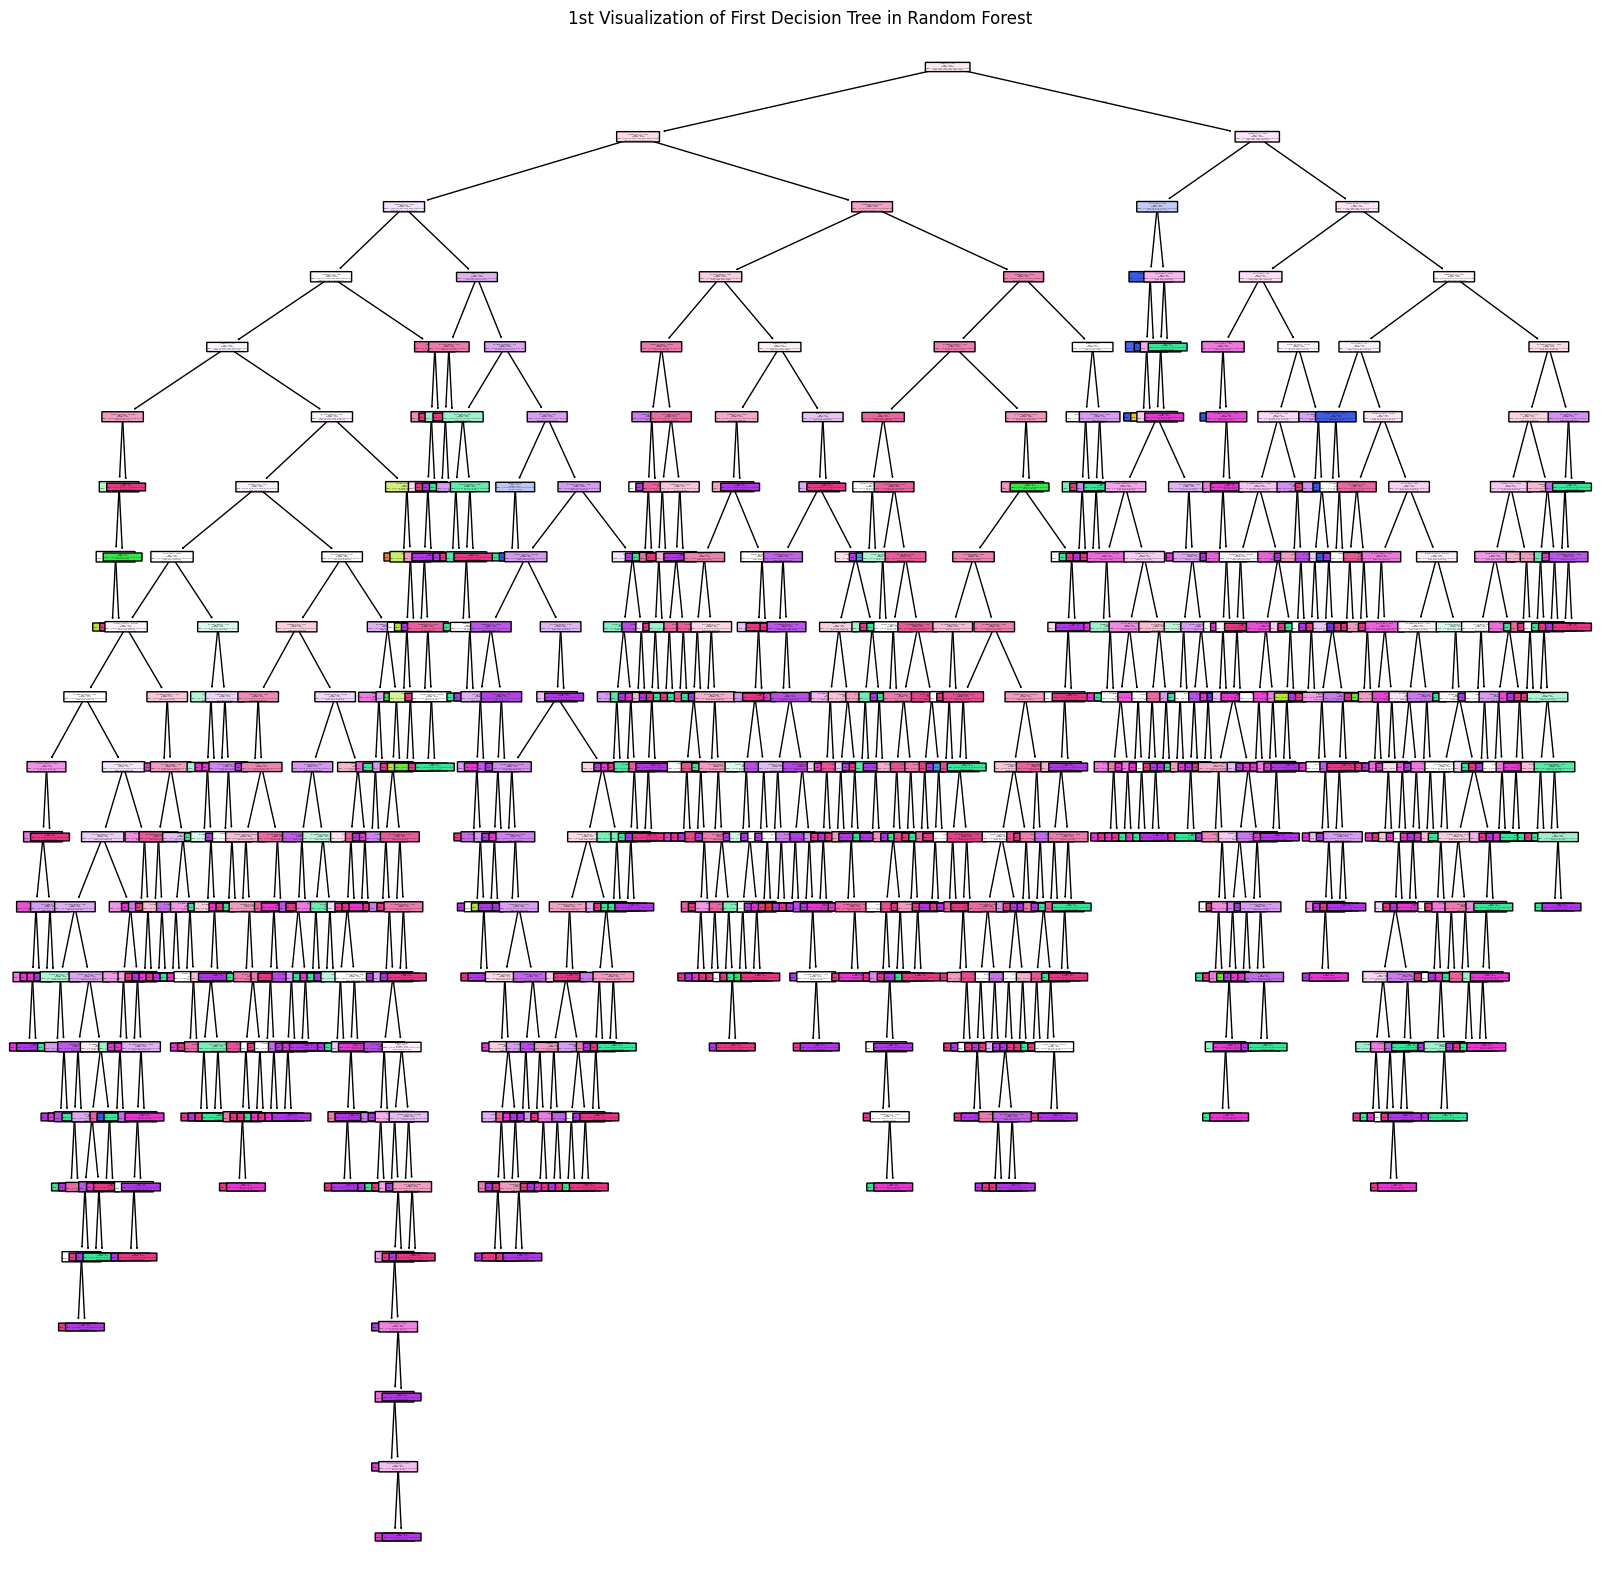

In [13]:
""" This is Sovunh Voeu's Random forest that calculated whether the loud coverage is a necessary data by going through and sorting 96453 results"""

# Define X and y correctly
X = data_sample.drop(['Loud Cover', 'Apparent Temperature (C)', 'Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis = 1)
y = data_sample['Summary']

# Convert specific columns to numeric, coercing errors to NaN
data_sample['Temperature (C)'] = pd.to_numeric(data_sample['Temperature (C)'], errors='coerce')
data_sample['Humidity'] = pd.to_numeric(data_sample['Humidity'], errors='coerce')
data_sample['Wind Speed (km/h)'] = pd.to_numeric(data_sample['Wind Speed (km/h)'], errors='coerce')
data_sample['Apparent Temperature (C)'] = pd.to_numeric(data_sample['Apparent Temperature (C)'], errors='coerce')
data_sample['Wind Bearing (degrees)'] = pd.to_numeric(data_sample['Wind Bearing (degrees)'], errors='coerce')
data_sample['Visibility (km)'] = pd.to_numeric(data_sample['Visibility (km)'], errors='coerce')
data_sample['Loud Cover'] = pd.to_numeric(data_sample['Loud Cover'], errors='coerce')
data_sample['Pressure (millibars)'] = pd.to_numeric(data_sample['Pressure (millibars)'], errors='coerce')

# Drop rows with NaN values
data_sample = data_sample.dropna()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

class_names = ['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
 'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
 'Breezy and Overcast', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy',
 'Windy and Foggy', 'Windy and Overcast', 'Breezy and Foggy',
 'Windy and Partly Cloudy', 'Breezy', 'Dry and Partly Cloudy',
 'Windy and Mostly Cloudy', 'Dangerously Windy and Partly Cloudy', 'Dry',
 'Windy', 'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
 'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain']

# %matplotlib inline
# plt.plot([1,1.6,3])
# %matplotlib notebook

# #calling it a second time may prevent some graphics errors
# %matplotlib notebook  
# plt.plot([1,1.6,3])

#First Graph
plt.figure(figsize=(20, 20))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, class_names = class_names, rounded=True, proportion=True)
plt.title("1st Visualization of First Decision Tree in Random Forest")
plt.show()

In [14]:
# After going through the random forest I had decided to drop these columns since they had either strong type errors or were in the way.
# data_sample = data.drop(['Loud Cover', 'Apparent Temperature (C)', 'Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis = 1)

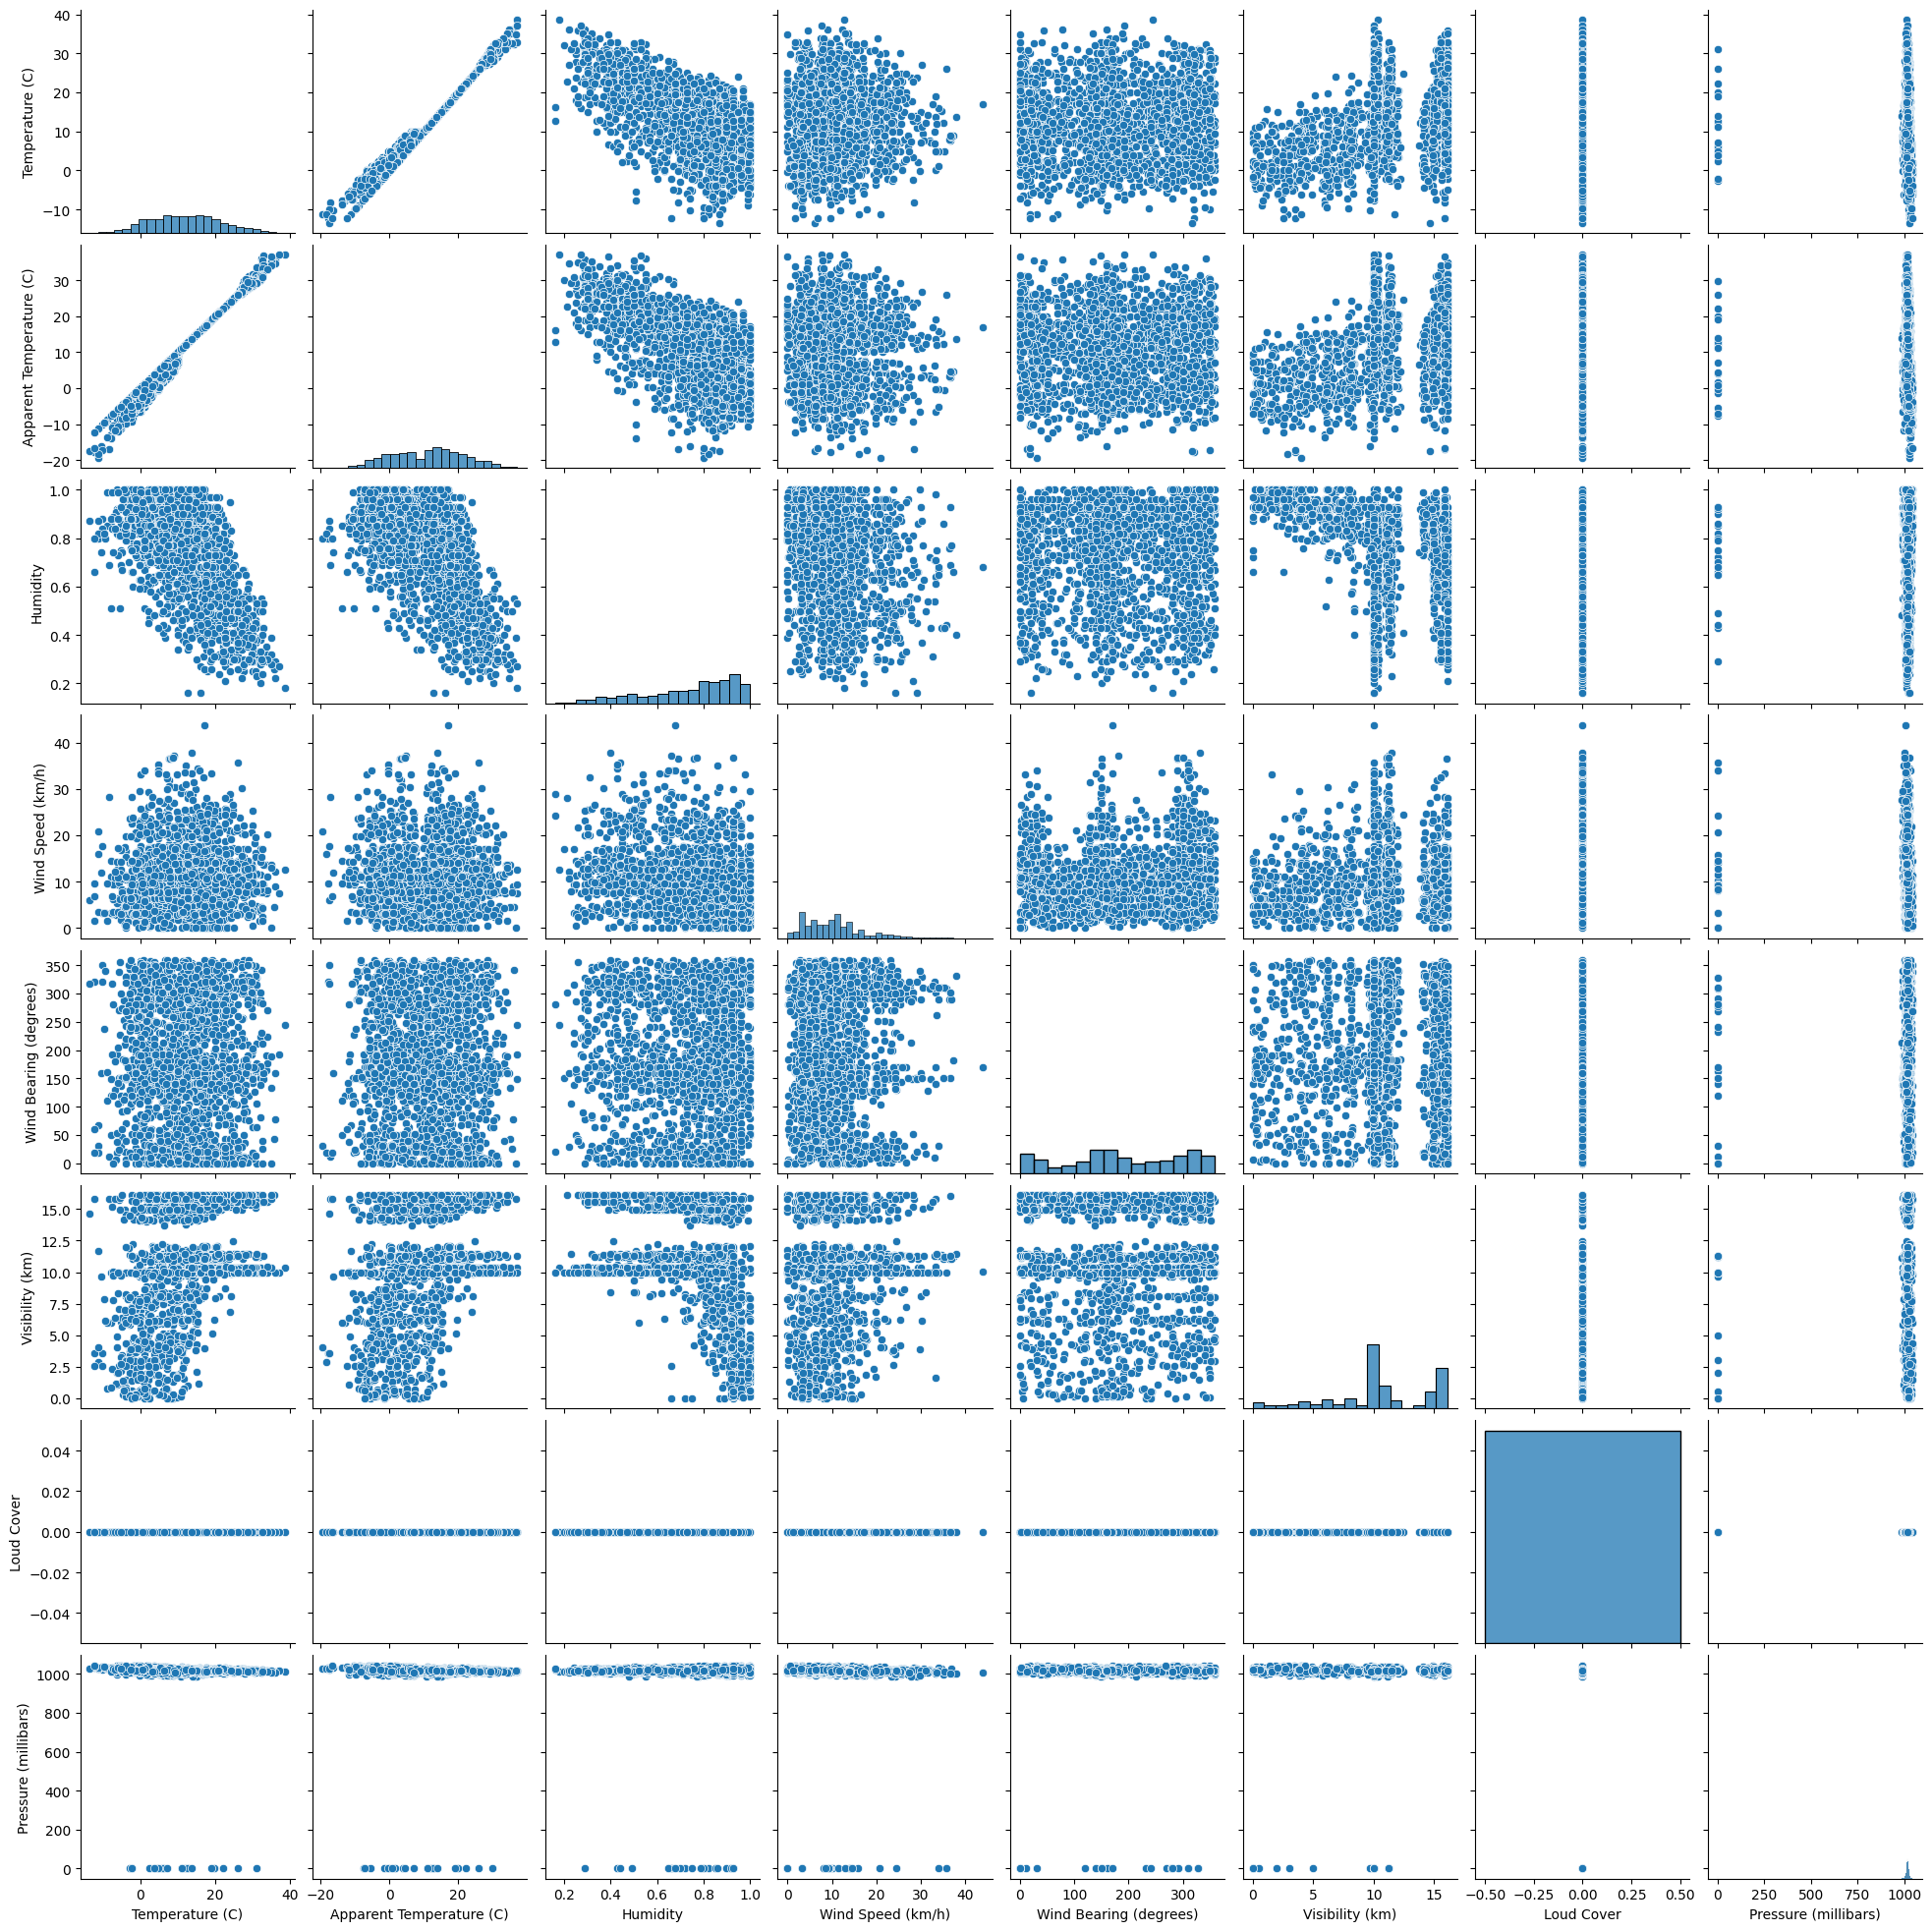

In [15]:
sns.pairplot(data_sample)

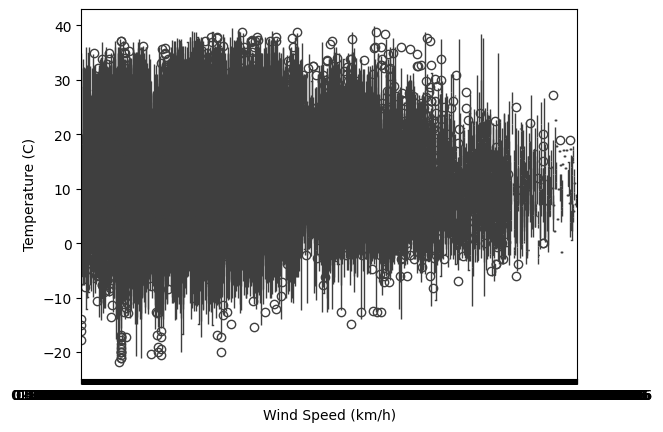

In [16]:
""" A box plot of the calculations of wind speed x Temperature to see if it causes any changes within the tables"""
# Create a box plot
sns.boxplot(x='Wind Speed (km/h)', y='Temperature (C)', data=data)

# Display the plot
plt.show()

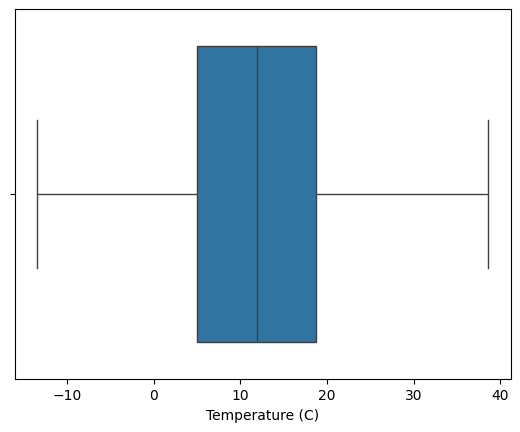

In [17]:
""" Boxplot on Temperature to detect and outliers that may be in the way"""
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to detect outliers in 'Temperature (C)' column
sns.boxplot(x=data_sample['Temperature (C)'])
plt.show()


In [18]:
""" Again I was skeptical of Temperature and whether it had any great changes and did not notice any major variance"""
column = 'Temperature (C)'

# Calculate Variance
variance = data_sample[column].var()
print(f"Variance: {variance}")

# Calculate Standard Deviation
std_dev = data_sample[column].std()
print(f"Standard Deviation: {std_dev}")

# Calculate Interquartile Range (IQR)
Q1 = data_sample[column].quantile(0.25)  # 25th percentile
Q3 = data_sample[column].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
print(f"Interquartile Range (IQR): {IQR}")

Variance: 86.85228728085762
Standard Deviation: 9.319457456357512
Interquartile Range (IQR): 13.70555555555556


In [19]:
#Reprinted the new data_sample that was sorted and filtered
data_sample.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
9597,2007-08-12 21:00:00.000 +0200,Mostly Cloudy,rain,18.938889,18.938889,0.84,7.7924,233.0,9.9820,0.0,1008.04,Partly cloudy throughout the day.
26204,2008-09-04 20:00:00.000 +0200,Partly Cloudy,rain,24.122222,24.122222,0.46,7.8568,209.0,10.3523,0.0,1012.41,Partly cloudy starting overnight continuing un...
6282,2006-05-26 19:00:00.000 +0200,Mostly Cloudy,rain,20.088889,20.088889,0.60,10.9480,346.0,9.9820,0.0,1019.48,Mostly cloudy throughout the day.
92330,2016-06-02 05:00:00.000 +0200,Overcast,rain,14.466667,14.466667,0.99,15.4077,291.0,6.8425,0.0,1011.14,Mostly cloudy throughout the day.
51067,2011-11-06 20:00:00.000 +0100,Mostly Cloudy,rain,9.716667,7.405556,0.67,16.4703,149.0,9.9015,0.0,1023.45,Mostly cloudy starting overnight continuing un...


In [20]:
#This new data still calculates the amount, mean, standard, minimum, percentages, and max of the weatherHistory.csv

data_sample.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.0,1989.000000
mean,11.997330,10.964759,0.738969,10.592440,189.422323,10.453190,0.0,1006.261760
std,9.319457,10.442620,0.195446,6.856265,106.098288,4.154053,0.0,104.263751
min,-13.416667,-19.422222,0.160000,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.000000,2.738889,0.610000,5.361300,120.000000,8.645700,0.0,1012.150000
50%,11.911111,11.911111,0.790000,9.660000,180.000000,10.046400,0.0,1016.480000
75%,18.705556,18.705556,0.900000,13.958700,290.000000,14.908600,0.0,1021.210000
max,38.633333,37.150000,1.000000,43.792000,359.000000,16.100000,0.0,1043.460000


In [21]:
#TODO LIST GIVEN BY PROFESSOR ON 11/25/2204
#COMPLETED fix random forest to focus on another column 
#COMPLETED Get the unique values in the columns I dropped, ex summary, precip type 
#COMPLETED Use hot and cold to do decision tree on what the weather may be

In [22]:
# Get unique values in a specific column
unique_values = data['Summary'].unique()
print(unique_values)

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']


In [23]:
# Get unique values in a specific column
unique_values = data['Precip Type'].unique()
print(unique_values)

['rain' 'snow' nan]


In [24]:
""" This is George Zmudzien's Logistic Regression"""

#load the data
# data_sample = pd.read_csv("C:/Users/Brand/Downloads/weatherHistory.csv")

#preprocessing/dropping unneccesary columns
data_sample = data_sample.drop(columns=['Formatted Date', 'Daily Summary', 'Loud Cover'])
data_sample = data_sample.dropna()

#encoding columns
label_encoder = LabelEncoder()
data_sample['Summary'] = label_encoder.fit_transform(data_sample['Summary']) #just a summary
data_sample['Precip Type'] = label_encoder.fit_transform(data_sample['Precip Type'])

#standardize
scaler = StandardScaler()
numerical_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                  'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
data_sample[numerical_cols] = scaler.fit_transform(data_sample[numerical_cols])

#real meaty stuff now
#define X and y(target)
X = data_sample.drop(columns=['Precip Type'])
y = data_sample['Precip Type'] #target

#testing/training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#actually train the damn thing(i *think* we got the values correct)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#print out results
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       532
           1       0.97      0.89      0.93        65

    accuracy                           0.98       597
   macro avg       0.98      0.94      0.96       597
weighted avg       0.98      0.98      0.98       597

Accuracy Score: 0.9849246231155779


In [25]:
""" This is George Zmudzien's Multinomial Naive Bayes"""

data_sample = pd.read_csv("C:/Users/Brand/Downloads/weatherHistory.csv")
X_text = data_sample['Summary']
y = data_sample['Precip Type']

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data_sample.dropna(subset=['Summary', 'Precip Type'], inplace=True)
print(data_sample.isna().sum())
data_sample = data_sample[data_sample['Summary'].str.strip() != '']
data_sample = data_sample[data_sample['Precip Type'].str.strip() != '']

# Ensure that after dropping rows with NaN in 'text' and 'label', the indexes are aligned
data_sample.dropna(subset=['Summary', 'Precip Type'], inplace=True)
X_text = data_sample['Summary']
y = data_sample['Precip Type']

# Re-split the data
X = vectorizer.fit_transform(X_text)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
Classification Report:


C:\Users\Brand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Brand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Brand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

        rain       0.89      1.00      0.94     25547
        snow       0.00      0.00      0.00      3234

    accuracy                           0.89     28781
   macro avg       0.44      0.50      0.47     28781
weighted avg       0.79      0.89      0.83     28781

Accuracy Score: 0.887634203120114


In [26]:
"""
Name: Sovunh Voeu, George Zmudzien
Professor: Poonam Kumari
Class: COMP470-001
"""

from flask import Flask, request
import joblib
import numpy as np
import nest_asyncio

# Allow Flask to run in Jupyter Notebook
nest_asyncio.apply()

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
try:
    model = joblib.load('my_model.pkl')
except FileNotFoundError:
    raise FileNotFoundError("The model file 'my_model.pkl' was not found. Ensure it is in the same directory.")

@app.route('/', methods=['GET', 'POST'])
def index():
    prediction = None  # Initialize to avoid UnboundLocalError
    error_message = None

    if request.method == 'POST':
        try:
            # Get input data from the form
            data = [
                float(request.form['feature1']),
                float(request.form['feature2'])
            ]
            # Convert input to numpy array and reshape for prediction
            input_data = np.array(data).reshape(1, -1)
            # Get prediction from the model
            prediction = model.predict(input_data)[0]
        except ValueError:
            error_message = "Invalid input. Please enter valid numerical values."
        except Exception as e:
            error_message = f"An error occurred: {str(e)}"

    # Generate HTML response dynamically
    html = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Model Prediction</title>
    </head>
    <body>
        <h1>Enter Data to Test Model</h1>
        <form method="POST">
            Feature 1: <input type="text" name="feature1" required><br>
            Feature 2: <input type="text" name="feature2" required><br>
            <input type="submit" value="Submit">
        </form>
        """
    if error_message:
        html += f"<h2 style='color:red;'>{error_message}</h2>"
    elif prediction is not None:
        html += f"<h2>Prediction: {prediction}</h2>"
    html += """
    </body>
    </html>
    """
    return html

if __name__ == '__main__':
    app.run(port=8000)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [02/Dec/2024 17:46:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2024 17:47:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2024 17:47:20] "GET / HTTP/1.1" 200 -
